# Training

## Importing Libraries

In [1]:
import pandas as pd 
import numpy as np

from sklearn.preprocessing import LabelEncoder

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Ignores warning messages.
import warnings
warnings.filterwarnings('ignore')

# #Prints all statements
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import itertools

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
le = LabelEncoder()

In [3]:
unique_SSN = []

# open file and read the content in a list
with open(r'list_files//unique_SSN.txt', 'r') as fp:
    for line in fp:
        # remove linebreak from a current name
        # linebreak is the last character of each line
        x = line[:-1]

        # add current item to the list
        unique_SSN.append(int(x))

## Import Dataset

In [4]:
df = pd.read_csv('checkpoints//df_final.csv')

In [5]:
print(f'Length of DataFrame : {len(df)}')
print(f'DataFrame Columns : {list(df.columns)}')

Length of DataFrame : 100000
DataFrame Columns : ['Month', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']


In [6]:
df.head()

,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,26.822620,265,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,February,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,31.944960,266,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,March,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,28.609352,267,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,April,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,31.377862,268,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,May,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,24.797347,269,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


### Selecting Features

##### We select relevant columns from our previous notebooks.

In [7]:
columns_to_keep = set(['SSN',
        'Monthly_Inhand_Salary',
        'Num_Bank_Accounts',
        'Num_Credit_Card',
        'Interest_Rate',
        'Delay_from_due_date',
        'Changed_Credit_Limit',
        'Credit_Mix',
        'Outstanding_Debt',
        'Credit_Utilization_Ratio',
        'Payment_of_Min_Amount',
        'Payment_Behaviour',
        'Monthly_Balance',
        'Type_of_Loan',
        'Credit_History_Age',
        'Credit_Score'])
columns_to_drop = set(df.columns) - columns_to_keep
print(f'Columns to keep : {columns_to_keep}')
print(f'Columns to drop : {columns_to_drop}')

Columns to keep : {'Credit_History_Age', 'Type_of_Loan', 'Credit_Score', 'Changed_Credit_Limit', 'Credit_Mix', 'Credit_Utilization_Ratio', 'Num_Credit_Card', 'Interest_Rate', 'Monthly_Inhand_Salary', 'Outstanding_Debt', 'Monthly_Balance', 'Delay_from_due_date', 'Payment_of_Min_Amount', 'SSN', 'Num_Bank_Accounts', 'Payment_Behaviour'}
Columns to drop : {'Num_of_Loan', 'Age', 'Annual_Income', 'Amount_invested_monthly', 'Num_Credit_Inquiries', 'Month', 'Occupation', 'Num_of_Delayed_Payment', 'Total_EMI_per_month'}


### Drop Irrelevant Columns

In [8]:
df.drop(columns = [col for col in columns_to_drop],  axis = 1,inplace = True)


### Details on new dataframe

In [9]:
df.columns

Index(['SSN', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Type_of_Loan', 'Delay_from_due_date',
       'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SSN                       100000 non-null  int64  
 1   Monthly_Inhand_Salary     100000 non-null  float64
 2   Num_Bank_Accounts         100000 non-null  int64  
 3   Num_Credit_Card           100000 non-null  int64  
 4   Interest_Rate             100000 non-null  int64  
 5   Type_of_Loan              100000 non-null  object 
 6   Delay_from_due_date       100000 non-null  int64  
 7   Changed_Credit_Limit      100000 non-null  float64
 8   Credit_Mix                100000 non-null  object 
 9   Outstanding_Debt          100000 non-null  float64
 10  Credit_Utilization_Ratio  100000 non-null  float64
 11  Credit_History_Age        100000 non-null  int64  
 12  Payment_of_Min_Amount     100000 non-null  object 
 13  Payment_Behaviour         100000 non-null  ob

# Preparing Data

### Converting Object Data types to Numerical

### Type Of Loan

In [11]:
df['Type_of_Loan'].head()

0    Auto, Credit-Builder, Personal, and HomeEquity
1    Auto, Credit-Builder, Personal, and HomeEquity
2    Auto, Credit-Builder, Personal, and HomeEquity
3    Auto, Credit-Builder, Personal, and HomeEquity
4    Auto, Credit-Builder, Personal, and HomeEquity
Name: Type_of_Loan, dtype: object

In [12]:
df['Type_of_Loan'].nunique()

6260

### One hot Encoding

In [13]:
corresponding_unique_type_of_loan_values = {}
for ssn in unique_SSN:
    corresponding_unique_type_of_loan_values[ssn] = list(df[df['SSN'] == ssn]['Type_of_Loan'].unique())

In [14]:
types_of_loan = set()

In [15]:
for values in corresponding_unique_type_of_loan_values.values():
    for i in range(len(values)):
        types_of_loan.add(values[0].split(',')[i].split(' Loan')[0].replace(' ','').replace('and',''))

In [16]:
dataframe_type_of_loan_list = sorted(['Credit-Builder Loan',
                               'Not Specified',
                               'Debt Consolidation Loan',
                               'Auto Loan',
                               'Student Loan',
                               'Home Equity Loan', 
                               'Mortgage Loan',
                               'Personal Loan',
                               'Payday Loan'])
dataframe_type_of_loan_list

processed_types_of_loan_list = sorted(list(types_of_loan))
processed_types_of_loan_list

['Auto Loan',
 'Credit-Builder Loan',
 'Debt Consolidation Loan',
 'Home Equity Loan',
 'Mortgage Loan',
 'Not Specified',
 'Payday Loan',
 'Personal Loan',
 'Student Loan']

['Auto',
 'Credit-Builder',
 'DebtConsolidation',
 'HomeEquity',
 'Mortgage',
 'NotSpecified',
 'Payday',
 'Personal',
 'Student']

In [17]:
def map_type_of_loan(txt):
    txt = str(txt)
    for i in range(len(processed_types_of_loan_list)):
        txt = txt.replace(' and ', ' ')
        txt = txt.replace(dataframe_type_of_loan_list[i],processed_types_of_loan_list[i])
    return txt

In [18]:
df['Type_of_Loan'].head()

0    Auto, Credit-Builder, Personal, and HomeEquity
1    Auto, Credit-Builder, Personal, and HomeEquity
2    Auto, Credit-Builder, Personal, and HomeEquity
3    Auto, Credit-Builder, Personal, and HomeEquity
4    Auto, Credit-Builder, Personal, and HomeEquity
Name: Type_of_Loan, dtype: object

In [19]:
index = 0
for type_of_loan in processed_types_of_loan_list:
    df.insert(loc = 11 + index, column = type_of_loan , value = 0)
    index += 1

In [20]:
for type_of_loan in processed_types_of_loan_list:    
    df[type_of_loan] = df['Type_of_Loan'].apply(lambda x:1 if type_of_loan in x else 0)

In [21]:
df.drop('Type_of_Loan', axis = 1, inplace = True)

In [22]:
df.head()

,SSN,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,...,Mortgage,NotSpecified,Payday,Personal,Student,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Monthly_Balance,Credit_Score
0,821000265,1824.843333,3,4,3,3,11.27,Good,809.98,26.822620,...,0,0,0,1,0,265,No,High_spent_Small_value_payments,312.494089,Good
1,821000265,1824.843333,3,4,3,3,11.27,Good,809.98,31.944960,...,0,0,0,1,0,266,No,Low_spent_Large_value_payments,284.629162,Good
2,821000265,1824.843333,3,4,3,3,11.27,Good,809.98,28.609352,...,0,0,0,1,0,267,No,Low_spent_Medium_value_payments,331.209863,Good
3,821000265,1824.843333,3,4,3,5,6.27,Good,809.98,31.377862,...,0,0,0,1,0,268,No,Low_spent_Small_value_payments,223.451310,Good
4,821000265,1824.843333,3,4,3,6,11.27,Good,809.98,24.797347,...,0,0,0,1,0,269,No,High_spent_Medium_value_payments,341.489231,Good


### Credit_Mix

In [23]:
df['Credit_Mix'].head()

0    Good
1    Good
2    Good
3    Good
4    Good
Name: Credit_Mix, dtype: object

In [24]:
df['Credit_Mix'].unique()
df['Credit_Mix'].value_counts()

array(['Good', 'Standard', 'Bad'], dtype=object)

Standard    45848
Good        30384
Bad         23768
Name: Credit_Mix, dtype: int64

In [25]:
map_credit_mix = {'Bad' : 0, 'Good' : 1,'Standard' : 2}
df['Credit_Mix'] = df['Credit_Mix'].map(map_credit_mix)

In [26]:
df['Credit_Mix'].unique()
df['Credit_Mix'].value_counts()

array([1, 2, 0], dtype=int64)

2    45848
1    30384
0    23768
Name: Credit_Mix, dtype: int64

### Payment_of_Min_Amount

In [27]:
df['Payment_of_Min_Amount'].head()

0    No
1    No
2    No
3    No
4    No
Name: Payment_of_Min_Amount, dtype: object

In [28]:
df['Payment_of_Min_Amount'].unique()
df['Payment_of_Min_Amount'].value_counts()

array(['No', 'Yes'], dtype=object)

Yes    59432
No     40568
Name: Payment_of_Min_Amount, dtype: int64

In [29]:
map_payment_of_min_amount = {'Yes' : 1, 'No' : 0}
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].map(map_payment_of_min_amount)

In [30]:
df['Payment_of_Min_Amount'].unique()
df['Payment_of_Min_Amount'].value_counts()

array([0, 1], dtype=int64)

1    59432
0    40568
Name: Payment_of_Min_Amount, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SSN                       100000 non-null  int64  
 1   Monthly_Inhand_Salary     100000 non-null  float64
 2   Num_Bank_Accounts         100000 non-null  int64  
 3   Num_Credit_Card           100000 non-null  int64  
 4   Interest_Rate             100000 non-null  int64  
 5   Delay_from_due_date       100000 non-null  int64  
 6   Changed_Credit_Limit      100000 non-null  float64
 7   Credit_Mix                100000 non-null  int64  
 8   Outstanding_Debt          100000 non-null  float64
 9   Credit_Utilization_Ratio  100000 non-null  float64
 10  Auto                      100000 non-null  int64  
 11  Credit-Builder            100000 non-null  int64  
 12  DebtConsolidation         100000 non-null  int64  
 13  HomeEquity                100000 non-null  in

### Payment_Behaviour

In [32]:
df['Payment_Behaviour'].unique()
df['Payment_Behaviour'].value_counts()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', 'NotSpecified',
       'High_spent_Large_value_payments'], dtype=object)

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
NotSpecified                         7600
Name: Payment_Behaviour, dtype: int64

In [33]:
df['Payment_Behaviour'] = le.fit_transform(df['Payment_Behaviour'])

In [34]:
df['Payment_Behaviour'].unique()
df['Payment_Behaviour'].value_counts()

array([2, 3, 4, 5, 1, 6, 0])

5    25513
1    17540
4    13861
0    13721
2    11340
3    10425
6     7600
Name: Payment_Behaviour, dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SSN                       100000 non-null  int64  
 1   Monthly_Inhand_Salary     100000 non-null  float64
 2   Num_Bank_Accounts         100000 non-null  int64  
 3   Num_Credit_Card           100000 non-null  int64  
 4   Interest_Rate             100000 non-null  int64  
 5   Delay_from_due_date       100000 non-null  int64  
 6   Changed_Credit_Limit      100000 non-null  float64
 7   Credit_Mix                100000 non-null  int64  
 8   Outstanding_Debt          100000 non-null  float64
 9   Credit_Utilization_Ratio  100000 non-null  float64
 10  Auto                      100000 non-null  int64  
 11  Credit-Builder            100000 non-null  int64  
 12  DebtConsolidation         100000 non-null  int64  
 13  HomeEquity                100000 non-null  in

### Credit_Score

In [36]:
df['Credit_Score'].unique()
df['Credit_Score'].value_counts()

array(['Good', 'Standard', 'Poor'], dtype=object)

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [37]:
map_credit_score   = {'Good' : 0,'Poor' : 1, 'Standard' : 2}
df['Credit_Score'] = df['Credit_Score'].map(map_credit_score)

In [38]:
df['Credit_Score'].unique()
df['Credit_Score'].value_counts()

array([0, 2, 1], dtype=int64)

2    53174
1    28998
0    17828
Name: Credit_Score, dtype: int64

## Select Features

In [39]:
X,y=df.drop(columns = ['Credit_Score'],axis=1),df['Credit_Score']

In [40]:
X.corrwith(y)

SSN                         0.011919
Monthly_Inhand_Salary      -0.078955
Num_Bank_Accounts           0.173234
Num_Credit_Card             0.109595
Interest_Rate               0.120170
Delay_from_due_date         0.096984
Changed_Credit_Limit        0.188842
Credit_Mix                  0.229920
Outstanding_Debt            0.037153
Credit_Utilization_Ratio   -0.014371
Auto                        0.026571
Credit-Builder              0.024562
DebtConsolidation           0.032146
HomeEquity                  0.026376
Mortgage                    0.020499
NotSpecified               -0.010108
Payday                      0.025630
Personal                    0.036713
Student                     0.016661
Credit_History_Age         -0.102603
Payment_of_Min_Amount       0.278235
Payment_Behaviour           0.018793
Monthly_Balance            -0.061176
dtype: float64

### Selecting Features

In [41]:
columns_to_drop =[]
for col in X.columns:
    if abs(X[col].corr(y)) < 0.05:
        columns_to_drop.append(col)

In [42]:
columns_to_drop

['SSN',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Auto',
 'Credit-Builder',
 'DebtConsolidation',
 'HomeEquity',
 'Mortgage',
 'NotSpecified',
 'Payday',
 'Personal',
 'Student',
 'Payment_Behaviour']

In [43]:
X,y=df.drop(columns = columns_to_drop,axis=1),df['Credit_Score']

In [44]:
X.head()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Monthly_Balance,Credit_Score
0,1824.843333,3,4,3,3,11.27,1,265,0,312.494089,0
1,1824.843333,3,4,3,3,11.27,1,266,0,284.629162,0
2,1824.843333,3,4,3,3,11.27,1,267,0,331.209863,0
3,1824.843333,3,4,3,5,6.27,1,268,0,223.451310,0
4,1824.843333,3,4,3,6,11.27,1,269,0,341.489231,0


In [45]:
train_X,test_X,train_y,test_y = train_test_split(X , y , test_size = 0.2, random_state = 11)

# Training

In [46]:
Category_class = ['Good','Poor','Standard']

## KNN

In [47]:
params = {'n_neighbors':[5,7,9,11,13],
        'metric':['cosine','euclidean','manhattan'],
        'weights':['uniform','distance']}

In [48]:
max_score = 0.001
### for selecting the best hyperparameters
for combination in itertools.product(*params.values()):
    param_dict = dict(zip(params.keys(), combination))
    print("Training with hyper parameters:", param_dict)

    knn = KNeighborsClassifier(**param_dict)
    knn.fit(train_X, train_y)

    train_score = knn.score(train_X,train_y)
    test_score = knn.score(test_X, test_y)
    print(f'Train Accuracy Score : {train_score}')
    print(f'Test Accuracy Score  : {test_score}')
    print('---------------------------------------------------------------------------------------------------------')
    
    if test_score > max_score:
        max_score = test_score
        hyper_parameters = combination
print(f'Best hyper-parameter : {hyper_parameters}')
print('Score : ', max_score)

Training with hyper parameters: {'n_neighbors': 5, 'metric': 'cosine', 'weights': 'uniform'}


KNeighborsClassifier(metric='cosine')

Train Accuracy Score : 0.7518875
Test Accuracy Score  : 0.6239
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'n_neighbors': 5, 'metric': 'cosine', 'weights': 'distance'}


KNeighborsClassifier(metric='cosine', weights='distance')

Train Accuracy Score : 1.0
Test Accuracy Score  : 0.6454
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'n_neighbors': 5, 'metric': 'euclidean', 'weights': 'uniform'}


KNeighborsClassifier(metric='euclidean')

Train Accuracy Score : 0.7546
Test Accuracy Score  : 0.61825
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'n_neighbors': 5, 'metric': 'euclidean', 'weights': 'distance'}


KNeighborsClassifier(metric='euclidean', weights='distance')

Train Accuracy Score : 1.0
Test Accuracy Score  : 0.6626
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'n_neighbors': 5, 'metric': 'manhattan', 'weights': 'uniform'}


KNeighborsClassifier(metric='manhattan')

Train Accuracy Score : 0.8161875
Test Accuracy Score  : 0.70835
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'n_neighbors': 5, 'metric': 'manhattan', 'weights': 'distance'}


KNeighborsClassifier(metric='manhattan', weights='distance')

Train Accuracy Score : 1.0
Test Accuracy Score  : 0.7388
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'n_neighbors': 7, 'metric': 'cosine', 'weights': 'uniform'}


KNeighborsClassifier(metric='cosine', n_neighbors=7)

Train Accuracy Score : 0.7269375
Test Accuracy Score  : 0.6317
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'n_neighbors': 7, 'metric': 'cosine', 'weights': 'distance'}


KNeighborsClassifier(metric='cosine', n_neighbors=7, weights='distance')

Train Accuracy Score : 1.0
Test Accuracy Score  : 0.6535
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'n_neighbors': 7, 'metric': 'euclidean', 'weights': 'uniform'}


KNeighborsClassifier(metric='euclidean', n_neighbors=7)

Train Accuracy Score : 0.7216625
Test Accuracy Score  : 0.61235
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'n_neighbors': 7, 'metric': 'euclidean', 'weights': 'distance'}


KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='distance')

Train Accuracy Score : 1.0
Test Accuracy Score  : 0.6632
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'n_neighbors': 7, 'metric': 'manhattan', 'weights': 'uniform'}


KNeighborsClassifier(metric='manhattan', n_neighbors=7)

Train Accuracy Score : 0.790775
Test Accuracy Score  : 0.70185
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'n_neighbors': 7, 'metric': 'manhattan', 'weights': 'distance'}


KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

Train Accuracy Score : 1.0
Test Accuracy Score  : 0.7384
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'n_neighbors': 9, 'metric': 'cosine', 'weights': 'uniform'}


KNeighborsClassifier(metric='cosine', n_neighbors=9)

Train Accuracy Score : 0.7110375
Test Accuracy Score  : 0.63505
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'n_neighbors': 9, 'metric': 'cosine', 'weights': 'distance'}


KNeighborsClassifier(metric='cosine', n_neighbors=9, weights='distance')

Train Accuracy Score : 1.0
Test Accuracy Score  : 0.6572
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'n_neighbors': 9, 'metric': 'euclidean', 'weights': 'uniform'}


KNeighborsClassifier(metric='euclidean', n_neighbors=9)

Train Accuracy Score : 0.70145
Test Accuracy Score  : 0.6087
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'n_neighbors': 9, 'metric': 'euclidean', 'weights': 'distance'}


KNeighborsClassifier(metric='euclidean', n_neighbors=9, weights='distance')

Train Accuracy Score : 1.0
Test Accuracy Score  : 0.65715
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'n_neighbors': 9, 'metric': 'manhattan', 'weights': 'uniform'}


KNeighborsClassifier(metric='manhattan', n_neighbors=9)

Train Accuracy Score : 0.7711125
Test Accuracy Score  : 0.6951
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'n_neighbors': 9, 'metric': 'manhattan', 'weights': 'distance'}


KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')

Train Accuracy Score : 1.0
Test Accuracy Score  : 0.73875
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'n_neighbors': 11, 'metric': 'cosine', 'weights': 'uniform'}


KNeighborsClassifier(metric='cosine', n_neighbors=11)

Train Accuracy Score : 0.7008
Test Accuracy Score  : 0.63215
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'n_neighbors': 11, 'metric': 'cosine', 'weights': 'distance'}


KNeighborsClassifier(metric='cosine', n_neighbors=11, weights='distance')

Train Accuracy Score : 1.0
Test Accuracy Score  : 0.6575
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'n_neighbors': 11, 'metric': 'euclidean', 'weights': 'uniform'}


KNeighborsClassifier(metric='euclidean', n_neighbors=11)

Train Accuracy Score : 0.6872625
Test Accuracy Score  : 0.60845
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'n_neighbors': 11, 'metric': 'euclidean', 'weights': 'distance'}


KNeighborsClassifier(metric='euclidean', n_neighbors=11, weights='distance')

Train Accuracy Score : 1.0
Test Accuracy Score  : 0.65745
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'n_neighbors': 11, 'metric': 'manhattan', 'weights': 'uniform'}


KNeighborsClassifier(metric='manhattan', n_neighbors=11)

Train Accuracy Score : 0.7566
Test Accuracy Score  : 0.68685
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'n_neighbors': 11, 'metric': 'manhattan', 'weights': 'distance'}


KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')

Train Accuracy Score : 1.0
Test Accuracy Score  : 0.7368
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'n_neighbors': 13, 'metric': 'cosine', 'weights': 'uniform'}


KNeighborsClassifier(metric='cosine', n_neighbors=13)

Train Accuracy Score : 0.6929375
Test Accuracy Score  : 0.6343
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'n_neighbors': 13, 'metric': 'cosine', 'weights': 'distance'}


KNeighborsClassifier(metric='cosine', n_neighbors=13, weights='distance')

Train Accuracy Score : 1.0
Test Accuracy Score  : 0.65915
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'n_neighbors': 13, 'metric': 'euclidean', 'weights': 'uniform'}


KNeighborsClassifier(metric='euclidean', n_neighbors=13)

Train Accuracy Score : 0.6741875
Test Accuracy Score  : 0.6063
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'n_neighbors': 13, 'metric': 'euclidean', 'weights': 'distance'}


KNeighborsClassifier(metric='euclidean', n_neighbors=13, weights='distance')

Train Accuracy Score : 1.0
Test Accuracy Score  : 0.6564
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'n_neighbors': 13, 'metric': 'manhattan', 'weights': 'uniform'}


KNeighborsClassifier(metric='manhattan', n_neighbors=13)

Train Accuracy Score : 0.7448375
Test Accuracy Score  : 0.68005
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'n_neighbors': 13, 'metric': 'manhattan', 'weights': 'distance'}


KNeighborsClassifier(metric='manhattan', n_neighbors=13, weights='distance')

Train Accuracy Score : 1.0
Test Accuracy Score  : 0.73275
---------------------------------------------------------------------------------------------------------
Best hyper-parameter : (5, 'manhattan', 'distance')
Score :  0.7388


## Analysis on Best Hyper-Parameters

In [69]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan', weights = 'distance')
knn.fit(train_X,train_y)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [70]:
pred_y = knn.predict(test_X)
train_accuracy = round(knn.score(train_X, train_y)*100)
test_accuracy =round(accuracy_score(test_y, pred_y)*100)

print(f"Train Accuracy Score : {train_accuracy}")
print(f"Test Accuracy Score  : {test_accuracy}")
print()
print(classification_report(test_y, pred_y, target_names=Category_class))

Train Accuracy Score : 100
Test Accuracy Score  : 74

              precision    recall  f1-score   support

        Good       0.66      0.61      0.64      3520
        Poor       0.75      0.73      0.74      5806
    Standard       0.76      0.78      0.77     10674

    accuracy                           0.74     20000
   macro avg       0.72      0.71      0.72     20000
weighted avg       0.74      0.74      0.74     20000



<AxesSubplot:>

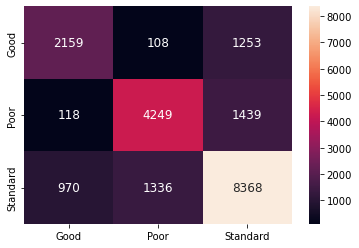

In [72]:
cf = confusion_matrix(test_y,pred_y)
cm_array_df = pd.DataFrame(cf, index = Category_class, columns = Category_class)
sns.heatmap(cm_array_df, annot=True, annot_kws={"size": 12}, fmt=".0f") 

## Decision Tree

In [52]:
params = {'criterion':['gini','entropy'],
        'max_depth':[2,4,6,8,10,12]
        }

In [53]:
max_score = 0.001
### for selecting the best hyperparameters
for combination in itertools.product(*params.values()):
    param_dict = dict(zip(params.keys(), combination))
    print("Training with hyper parameters:", param_dict)

    dtc = DecisionTreeClassifier(**param_dict)
    dtc.fit(train_X, train_y)

    train_score = dtc.score(train_X,train_y)
    test_score = dtc.score(test_X, test_y)
    print(f'Train Accuracy Score : {train_score}')
    print(f'Test Accuracy Score  : {test_score}')
    print('---------------------------------------------------------------------------------------------------------')
    
    if test_score > max_score:
        max_score = test_score
        hyper_parameters = combination
print(f'Best hyper-parameter : {hyper_parameters}')
print('Score : ', max_score)

Training with hyper parameters: {'criterion': 'gini', 'max_depth': 2}


DecisionTreeClassifier(max_depth=2)

Train Accuracy Score : 1.0
Test Accuracy Score  : 1.0
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'criterion': 'gini', 'max_depth': 4}


DecisionTreeClassifier(max_depth=4)

Train Accuracy Score : 1.0
Test Accuracy Score  : 1.0
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'criterion': 'gini', 'max_depth': 6}


DecisionTreeClassifier(max_depth=6)

Train Accuracy Score : 1.0
Test Accuracy Score  : 1.0
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'criterion': 'gini', 'max_depth': 8}


DecisionTreeClassifier(max_depth=8)

Train Accuracy Score : 1.0
Test Accuracy Score  : 1.0
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'criterion': 'gini', 'max_depth': 10}


DecisionTreeClassifier(max_depth=10)

Train Accuracy Score : 1.0
Test Accuracy Score  : 1.0
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'criterion': 'gini', 'max_depth': 12}


DecisionTreeClassifier(max_depth=12)

Train Accuracy Score : 1.0
Test Accuracy Score  : 1.0
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'criterion': 'entropy', 'max_depth': 2}


DecisionTreeClassifier(criterion='entropy', max_depth=2)

Train Accuracy Score : 1.0
Test Accuracy Score  : 1.0
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'criterion': 'entropy', 'max_depth': 4}


DecisionTreeClassifier(criterion='entropy', max_depth=4)

Train Accuracy Score : 1.0
Test Accuracy Score  : 1.0
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'criterion': 'entropy', 'max_depth': 6}


DecisionTreeClassifier(criterion='entropy', max_depth=6)

Train Accuracy Score : 1.0
Test Accuracy Score  : 1.0
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'criterion': 'entropy', 'max_depth': 8}


DecisionTreeClassifier(criterion='entropy', max_depth=8)

Train Accuracy Score : 1.0
Test Accuracy Score  : 1.0
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'criterion': 'entropy', 'max_depth': 10}


DecisionTreeClassifier(criterion='entropy', max_depth=10)

Train Accuracy Score : 1.0
Test Accuracy Score  : 1.0
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'criterion': 'entropy', 'max_depth': 12}


DecisionTreeClassifier(criterion='entropy', max_depth=12)

Train Accuracy Score : 1.0
Test Accuracy Score  : 1.0
---------------------------------------------------------------------------------------------------------
Best hyper-parameter : ('gini', 2)
Score :  1.0


## Analysis on Best Parameter

In [73]:
### As all so same result
pred_y = dtc.predict(test_X)
train_accuracy = round(dtc.score(train_X, train_y)*100)
test_accuracy =round(accuracy_score(test_y, pred_y)*100)

print(f"Train Accuracy Score : {train_accuracy}")
print(f"Test Accuracy Score  : {test_accuracy}")
print()
print(classification_report(test_y, pred_y, target_names=Category_class))

Train Accuracy Score : 100
Test Accuracy Score  : 100

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00      3520
        Poor       1.00      1.00      1.00      5806
    Standard       1.00      1.00      1.00     10674

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



<AxesSubplot:>

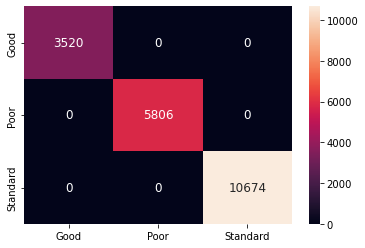

In [74]:
cf = confusion_matrix(test_y,pred_y)
cm_array_df = pd.DataFrame(cf, index = Category_class, columns = Category_class)
sns.heatmap(cm_array_df, annot=True, annot_kws={"size": 12}, fmt=".0f") 

## Random Forest Classifier

In [56]:
params = {
        'criterion':['gini','entropy'],
        'max_depth':[2,4,6,8,10,12]
    }

In [57]:
max_score = 0.001
### for selecting the best hyperparameters
for combination in itertools.product(*params.values()):
    param_dict = dict(zip(params.keys(), combination))
    print("Training with hyper parameters:", param_dict)

    rtc = RandomForestClassifier(**param_dict)
    rtc.fit(train_X, train_y)

    train_score = rtc.score(train_X,train_y)
    test_score = rtc.score(test_X, test_y)
    print(f'Train Accuracy Score : {train_score}')
    print(f'Test Accuracy Score  : {test_score}')
    print('---------------------------------------------------------------------------------------------------------')
    
    if test_score > max_score:
        max_score = test_score
        hyper_parameters = combination
print(f'Best hyper-parameter : {hyper_parameters}')
print('Score : ', max_score)

Training with hyper parameters: {'criterion': 'gini', 'max_depth': 2}


RandomForestClassifier(max_depth=2)

Train Accuracy Score : 0.9124375
Test Accuracy Score  : 0.9144
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'criterion': 'gini', 'max_depth': 4}


RandomForestClassifier(max_depth=4)

Train Accuracy Score : 0.9949
Test Accuracy Score  : 0.99485
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'criterion': 'gini', 'max_depth': 6}


RandomForestClassifier(max_depth=6)

Train Accuracy Score : 1.0
Test Accuracy Score  : 1.0
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'criterion': 'gini', 'max_depth': 8}


RandomForestClassifier(max_depth=8)

Train Accuracy Score : 1.0
Test Accuracy Score  : 1.0
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'criterion': 'gini', 'max_depth': 10}


RandomForestClassifier(max_depth=10)

Train Accuracy Score : 1.0
Test Accuracy Score  : 1.0
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'criterion': 'gini', 'max_depth': 12}


RandomForestClassifier(max_depth=12)

Train Accuracy Score : 1.0
Test Accuracy Score  : 1.0
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'criterion': 'entropy', 'max_depth': 2}


RandomForestClassifier(criterion='entropy', max_depth=2)

Train Accuracy Score : 0.925925
Test Accuracy Score  : 0.92725
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'criterion': 'entropy', 'max_depth': 4}


RandomForestClassifier(criterion='entropy', max_depth=4)

Train Accuracy Score : 0.9930875
Test Accuracy Score  : 0.9927
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'criterion': 'entropy', 'max_depth': 6}


RandomForestClassifier(criterion='entropy', max_depth=6)

Train Accuracy Score : 1.0
Test Accuracy Score  : 1.0
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'criterion': 'entropy', 'max_depth': 8}


RandomForestClassifier(criterion='entropy', max_depth=8)

Train Accuracy Score : 1.0
Test Accuracy Score  : 1.0
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'criterion': 'entropy', 'max_depth': 10}


RandomForestClassifier(criterion='entropy', max_depth=10)

Train Accuracy Score : 1.0
Test Accuracy Score  : 1.0
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'criterion': 'entropy', 'max_depth': 12}


RandomForestClassifier(criterion='entropy', max_depth=12)

Train Accuracy Score : 1.0
Test Accuracy Score  : 1.0
---------------------------------------------------------------------------------------------------------
Best hyper-parameter : ('gini', 6)
Score :  1.0


## Analyzing on Best Parameter

In [58]:
rtc = RandomForestClassifier(criterion = 'gini', max_depth = 8)
rtc.fit(train_X,train_y)

RandomForestClassifier(max_depth=8)

In [59]:
pred_y = rtc.predict(test_X)
train_accuracy = round(rtc.score(train_X, train_y)*100)
test_accuracy =round(accuracy_score(test_y, pred_y)*100)

print(f"Train Accuracy Score : {train_accuracy}")
print(f"Test Accuracy Score  : {test_accuracy}")
print()
print(classification_report(test_y, pred_y, target_names=Category_class))

Train Accuracy Score : 100
Test Accuracy Score  : 100

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00      3520
        Poor       1.00      1.00      1.00      5806
    Standard       1.00      1.00      1.00     10674

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



<AxesSubplot:>

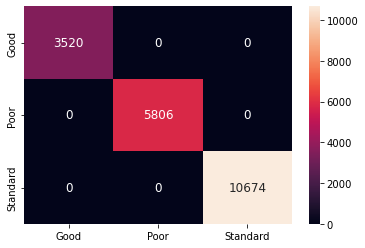

In [60]:
cf = confusion_matrix(test_y,pred_y)
cm_array_df = pd.DataFrame(cf, index = Category_class, columns = Category_class)
sns.heatmap(cm_array_df, annot=True, annot_kws={"size": 12}, fmt=".0f") 

## MultinomialNB

In [61]:
Xm,ym=df.drop(columns = columns_to_drop,axis=1),df['Credit_Score']
Xm = Xm.drop('Changed_Credit_Limit',axis = 1)

In [62]:
Xm['Num_Bank_Accounts'] = abs(Xm['Num_Bank_Accounts'])

In [63]:
train_Xm,test_Xm,train_ym,test_ym = train_test_split(Xm,ym,test_size = 0.2, random_state = 11)

In [64]:
params = {
        'alpha': [1.0,2.0],
        'fit_prior': [True,False]
    }

In [65]:
max_score = 0.001
### for selecting the best hyperparameters
for combination in itertools.product(*params.values()):
    param_dict = dict(zip(params.keys(), combination))
    print("Training with hyper parameters:", param_dict)

    mnb = MultinomialNB(**param_dict)
    mnb.fit(train_Xm, train_ym)

    train_score = mnb.score(train_Xm,train_ym)
    test_score = mnb.score(test_Xm, test_ym)
    print(f'Train Accuracy Score : {train_score}')
    print(f'Test Accuracy Score  : {test_score}')
    print('---------------------------------------------------------------------------------------------------------')
    
    if test_score > max_score:
        max_score = test_score
        hyper_parameters = combination
print(f'Best hyper-parameter : {hyper_parameters}')
print('Score : ', max_score)

Training with hyper parameters: {'alpha': 1.0, 'fit_prior': True}


MultinomialNB()

Train Accuracy Score : 0.5301125
Test Accuracy Score  : 0.52905
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'alpha': 1.0, 'fit_prior': False}


MultinomialNB(fit_prior=False)

Train Accuracy Score : 0.525425
Test Accuracy Score  : 0.52465
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'alpha': 2.0, 'fit_prior': True}


MultinomialNB(alpha=2.0)

Train Accuracy Score : 0.526025
Test Accuracy Score  : 0.52575
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'alpha': 2.0, 'fit_prior': False}


MultinomialNB(alpha=2.0, fit_prior=False)

Train Accuracy Score : 0.5212
Test Accuracy Score  : 0.52065
---------------------------------------------------------------------------------------------------------
Best hyper-parameter : (1.0, True)
Score :  0.52905


## Analyzing on Best HyperParameter

In [66]:
mnb = MultinomialNB(alpha = 1, fit_prior = True)
mnb.fit(train_Xm,train_ym)

MultinomialNB(alpha=1)

In [67]:
pred_y = mnb.predict(test_Xm)
train_accuracy = round(mnb.score(train_Xm, train_ym)*100)
test_accuracy =round(accuracy_score(test_ym, pred_y)*100)

print(f"Train Accuracy Score : {train_accuracy}")
print(f"Test Accuracy Score  : {test_accuracy}")
print()
print(classification_report(test_ym, pred_y, target_names=Category_class))

Train Accuracy Score : 53
Test Accuracy Score  : 53

              precision    recall  f1-score   support

        Good       0.41      0.54      0.46      3520
        Poor       0.49      0.68      0.57      5806
    Standard       0.65      0.44      0.53     10674

    accuracy                           0.53     20000
   macro avg       0.52      0.55      0.52     20000
weighted avg       0.56      0.53      0.53     20000



<AxesSubplot:>

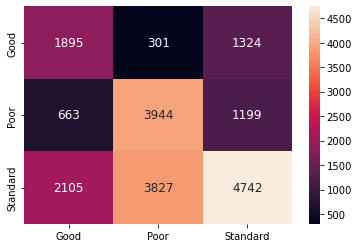

In [68]:
cf = confusion_matrix(test_y,pred_y)
cm_array_df = pd.DataFrame(cf, index = Category_class, columns = Category_class)
sns.heatmap(cm_array_df, annot=True, annot_kws={"size": 12}, fmt=".0f") 

## SVC

##### As SVC is hard to train on large dataset. Choosing only one on kernels.

In [75]:
params = {'kernel':['rbf','linear','poly']}

In [76]:
max_score = 0.001
### for selecting the best hyperparameters
for combination in itertools.product(*params.values()):
    param_dict = dict(zip(params.keys(), combination))
    print("Training with hyper parameters:", param_dict)

    svc = SVC(**param_dict)
    svc.fit(train_Xm, train_ym)

    train_score = svc.score(train_Xm,train_ym)
    test_score = svc.score(test_Xm, test_ym)
    print(f'Train Accuracy Score : {train_score}')
    print(f'Test Accuracy Score  : {test_score}')
    print('---------------------------------------------------------------------------------------------------------')
    
    if test_score > max_score:
        max_score = test_score
        hyper_parameters = combination
print(f'Best hyper-parameter : {hyper_parameters}')
print('Score : ', max_score)

Training with hyper parameters: {'kernel': 'rbf'}


SVC()

Train Accuracy Score : 0.5323625
Test Accuracy Score  : 0.53385
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'kernel': 'linear'}


SVC(kernel='linear')

Train Accuracy Score : 0.99995
Test Accuracy Score  : 1.0
---------------------------------------------------------------------------------------------------------
Training with hyper parameters: {'kernel': 'poly'}


SVC(kernel='poly')

Train Accuracy Score : 0.53125
Test Accuracy Score  : 0.5337
---------------------------------------------------------------------------------------------------------
Best hyper-parameter : ('linear',)
Score :  1.0


## Analyzing on Best Parameter

In [77]:
svc = SVC(kernel = 'linear')
svc.fit(train_X,train_y)

SVC(kernel='linear')

In [78]:
pred_y = svc.predict(test_X)
train_accuracy = round(svc.score(train_X, train_y)*100)
test_accuracy =round(accuracy_score(test_y, pred_y)*100)

print(f"Train Accuracy Score : {train_accuracy}")
print(f"Test Accuracy Score  : {test_accuracy}")
print()
print(classification_report(test_ym, pred_y, target_names=Category_class))

Train Accuracy Score : 100
Test Accuracy Score  : 100

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00      3520
        Poor       1.00      1.00      1.00      5806
    Standard       1.00      1.00      1.00     10674

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



<AxesSubplot:>

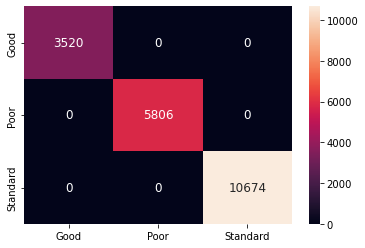

In [79]:
cf = confusion_matrix(test_y,pred_y)
cm_array_df = pd.DataFrame(cf, index = Category_class, columns = Category_class)
sns.heatmap(cm_array_df, annot=True, annot_kws={"size": 12}, fmt=".0f") 

## Using Cross Validation

In [80]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 11)
X,y=df.drop(columns = columns_to_drop,axis=1),df['Credit_Score']

## KNN

In [81]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'cosine', weights = 'distance')

In [82]:
scores = cross_val_score(knn, X, y, cv= kfold, scoring = 'accuracy')
print(f'Scores : {scores}')
print('----------------------------------------------------------------------------------------------------')
print('Model Score, Mean is %.3f and Standard Deviation is %.3f' %(scores.mean(), scores.std()))

Scores : [0.6454  0.64455 0.63585 0.64195 0.6448 ]
----------------------------------------------------------------------------------------------------
Model Score, Mean is 0.643 and Standard Deviation is 0.004


## Decision Tree Classifier

In [83]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=12)

In [84]:
scores = cross_val_score(dtc, X, y, cv= kfold, scoring = 'accuracy')
print(f'Scores : {scores}')
print('----------------------------------------------------------------------------------------------------')
print('Model Score, Mean is %.3f and Standard Deviation is %.3f' %(scores.mean(), scores.std()))

Scores : [1. 1. 1. 1. 1.]
----------------------------------------------------------------------------------------------------
Model Score, Mean is 1.000 and Standard Deviation is 0.000


## Random Tree Classifier

In [85]:
rtc = RandomForestClassifier(criterion = 'gini', max_depth = 8)

In [86]:
scores = cross_val_score(rtc, X, y, cv= kfold, scoring = 'accuracy')
print(f'Scores : {scores}')
print('----------------------------------------------------------------------------------------------------')
print('Model Score, Mean is %.3f and Standard Deviation is %.3f' %(scores.mean(), scores.std()))

Scores : [1. 1. 1. 1. 1.]
----------------------------------------------------------------------------------------------------
Model Score, Mean is 1.000 and Standard Deviation is 0.000


## Multinominal Bayes

In [87]:
mnb = MultinomialNB(alpha = 1, fit_prior = True)

In [88]:
scores = cross_val_score(mnb, Xm, ym, cv= kfold, scoring = 'accuracy')
print(f'Scores : {scores}')
print('----------------------------------------------------------------------------------------------------')
print('Model Score, Mean is %.3f and Standard Deviation is %.3f' %(scores.mean(), scores.std()))

Scores : [0.52905 0.52945 0.5311  0.52495 0.52675]
----------------------------------------------------------------------------------------------------
Model Score, Mean is 0.528 and Standard Deviation is 0.002


## SVC

In [89]:
svc = SVC(kernel = 'linear')

In [90]:
scores = cross_val_score(svc, Xm, ym, cv= kfold, scoring = 'accuracy')
print(f'Scores : {scores}')
print('----------------------------------------------------------------------------------------------------')
print('Model Score, Mean is %.3f and Standard Deviation is %.3f' %(scores.mean(), scores.std()))

Scores : [1.      0.99985 1.      0.9999  1.     ]
----------------------------------------------------------------------------------------------------
Model Score, Mean is 1.000 and Standard Deviation is 0.000
